In [221]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [222]:
# making a class like this makes it easy to 
# create ad-hoc objects and set late bound
# properties
class Object:
    pass

import os

results = []
for filename in sorted(os.listdir('../python/data/esc')):
    o = Object()
    o.filename = filename
    o.data = pd.read_csv('../python/data/esc/'+filename)
    results.append(o)

print results[0].data.head()

    seconds    meters          us   esc  odometer_ticks    ax  spur_delta_us  \
0  0.000000  0.000000  4052130373  1765              52  1.54          72169   
1  0.010005  0.006822  4052140378  1500              54  1.38          72169   
2  0.020005  0.017055  4052150378  1500              57  1.32          72169   
3  0.030000  0.027288  4052160373  1500              60  1.35          72169   
4  0.040011  0.040932  4052170384  1500              64  1.68          72169   

   spur_odo  
0      3140  
1      3140  
2      3140  
3      3140  
4      3140  


In [223]:
def big_plot():
  plt.figure(figsize=(15,10))

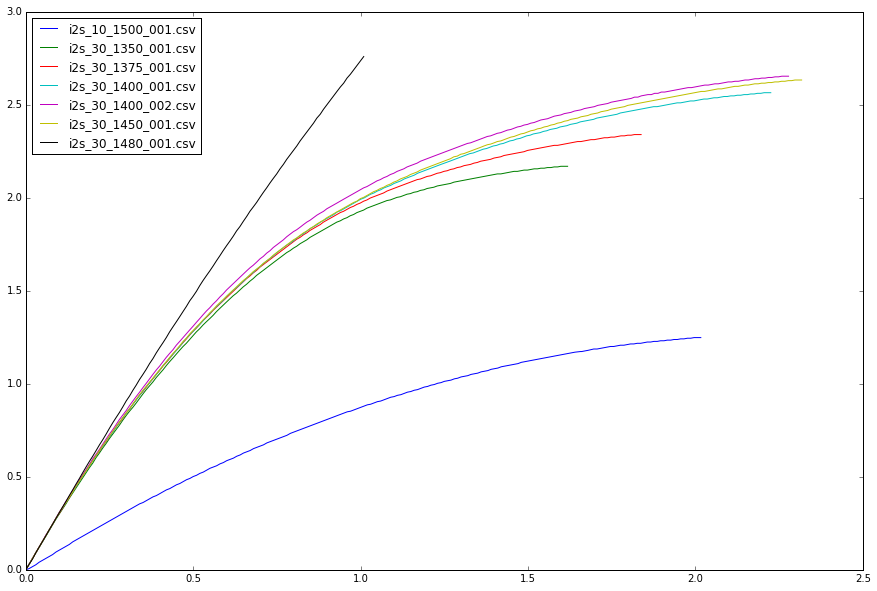

In [224]:
big_plot()
for r in results:
  plt.plot(r.data.seconds,r.data.meters,label=r.filename)

plt.legend(loc='best')
plt.show()

In [225]:
# calculate v each row of each run
for r in results:
    r.data.v = slope(d.meters,d.seconds)

In [226]:
from scipy.signal import savgol_filter

#todo: make a better smooth that handles ends better, probably by doing forward and reverse
def smooth(x, smooth_cycles=31,smooth_order=2):
    smooth_order = 2
    return savgol_filter(x,smooth_cycles,smooth_order)

#todo: make a better slope that averages the left slope and right slope and handles edges better
def slope(x,t):
    rv = np.diff(x)/np.diff(t)
    rv = np.append(rv, float('NaN'))
    return rv

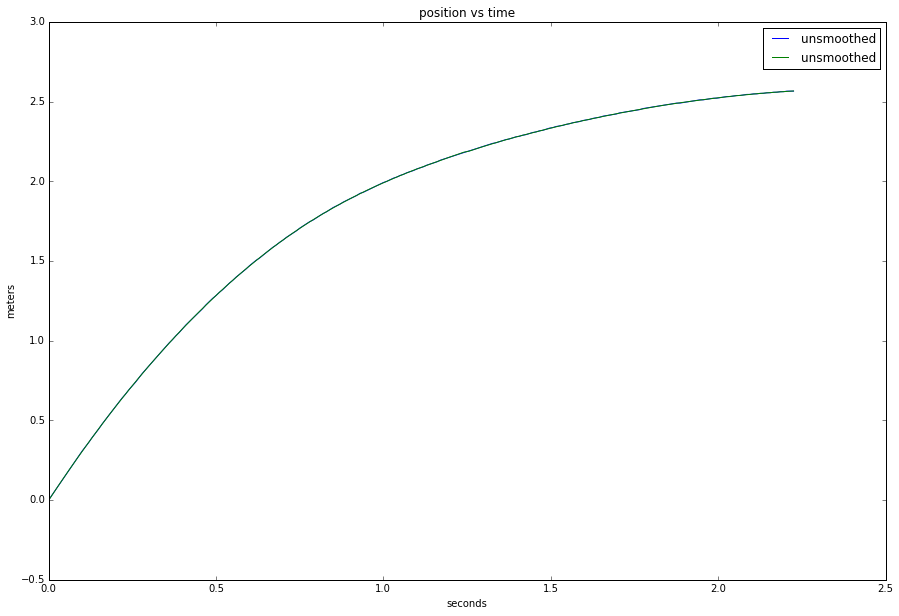

In [227]:
d = results[3].data
meters = d.meters
meters_smooth = smooth(meters)
big_plot()
plt.title('position vs time')
plt.plot(d.seconds,meters,label='unsmoothed')
plt.plot(d.seconds,meters_smooth,label='unsmoothed')
plt.xlabel('seconds')
plt.ylabel('meters')
plt.legend(loc='best')
plt.show()

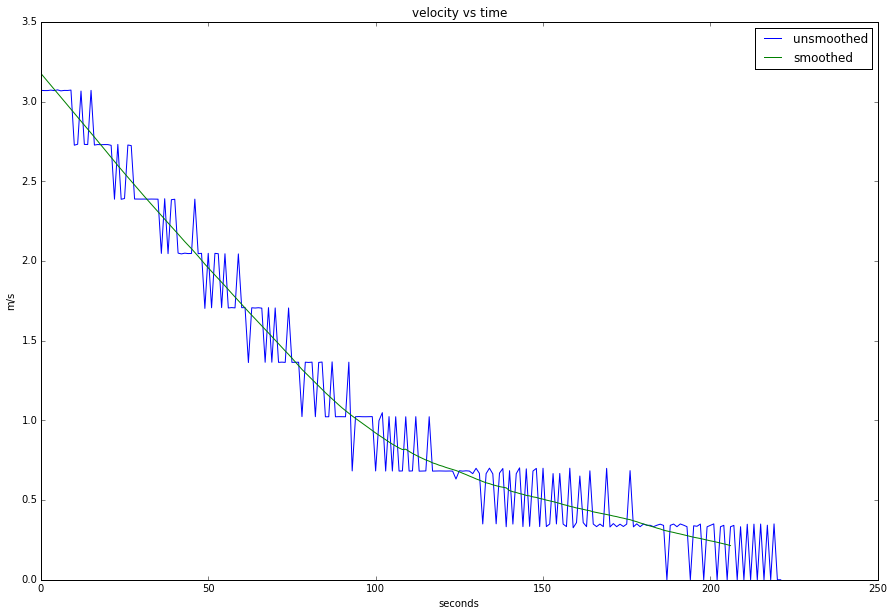

In [228]:
v=slope(meters,d.seconds)
v_smooth = smooth( slope(meters_smooth, d.seconds) )
big_plot()
plt.title('velocity vs time')
plt.plot(v,label='unsmoothed')
plt.plot(v_smooth,label='smoothed')
plt.ylabel('m/s')
plt.xlabel('seconds')
plt.legend(loc='best')
plt.show()

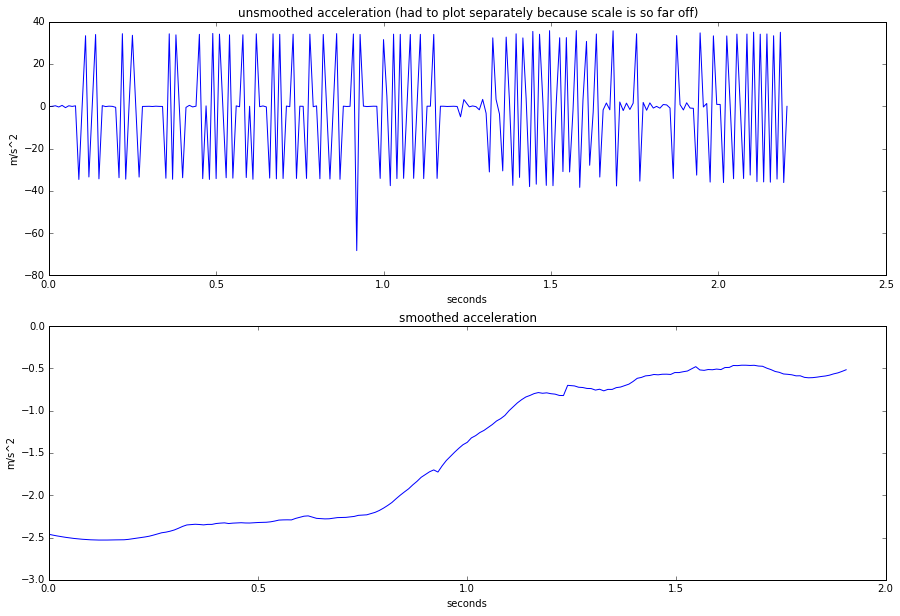

In [229]:
big_plot()
a = slope(v,d.seconds)
plt.subplot(211)
plt.title('unsmoothed acceleration (had to plot separately because scale is so far off)')
plt.plot(d.seconds,a)
plt.ylabel('m/s^2')
plt.xlabel('seconds')
plt.legend(loc='best')

plt.subplot(212)
plt.title('smoothed acceleration')
plt.ylabel('m/s^2')
plt.xlabel('seconds')
plt.legend(loc='best')
a_smooth = smooth(slope(v_smooth,d.seconds))
plt.plot(d.seconds,a_smooth)
plt.show()

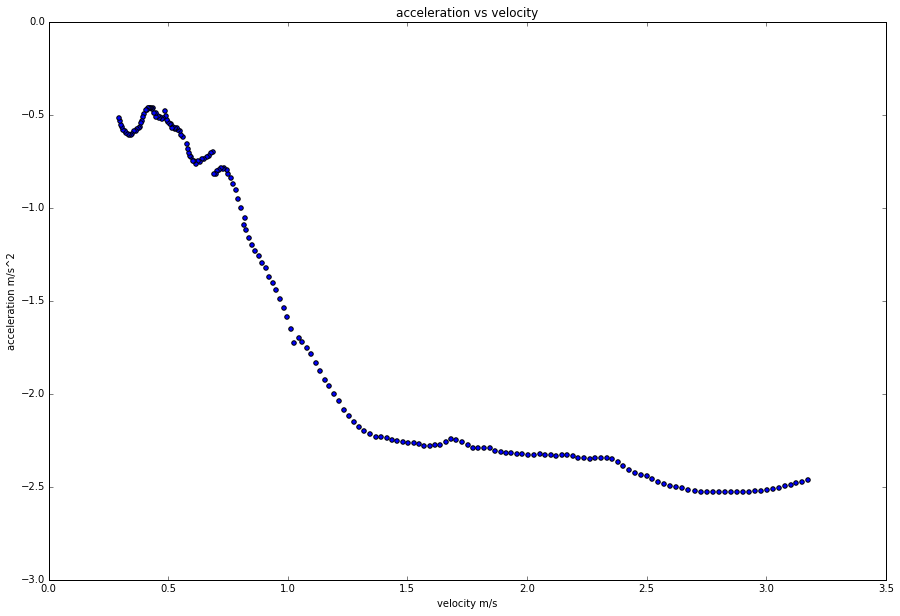

In [230]:
big_plot()
plt.scatter(v_smooth,a_smooth)
plt.title('acceleration vs velocity')
plt.xlabel('velocity m/s')
plt.ylabel('acceleration m/s^2')
plt.show()

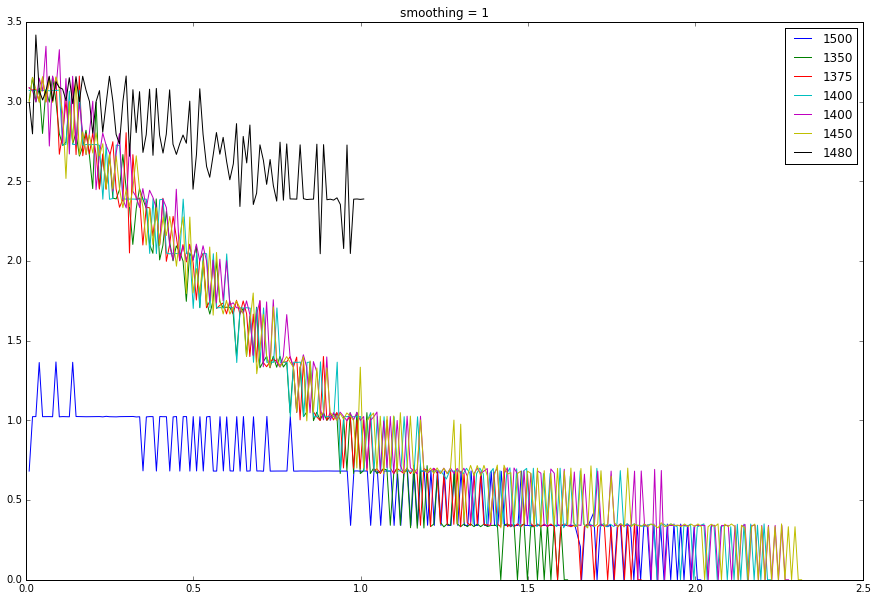

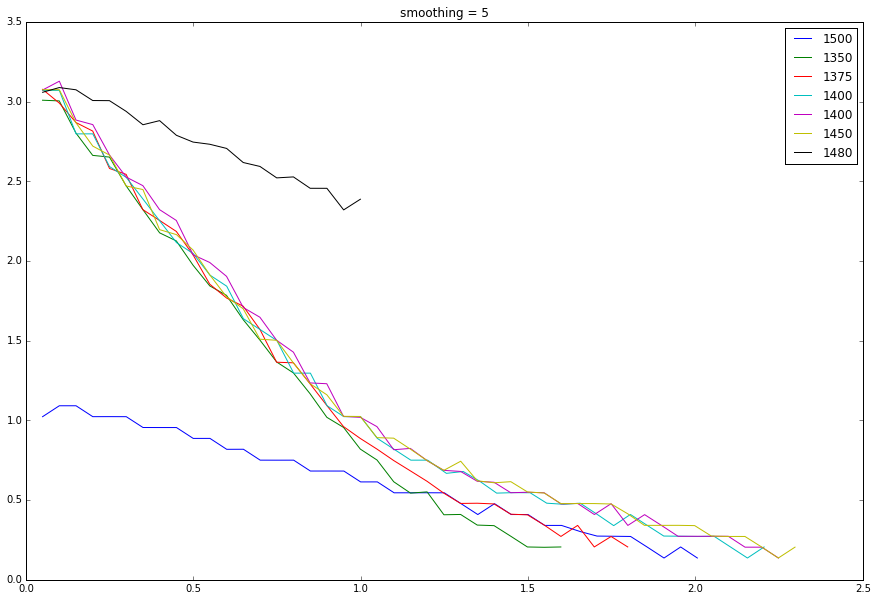

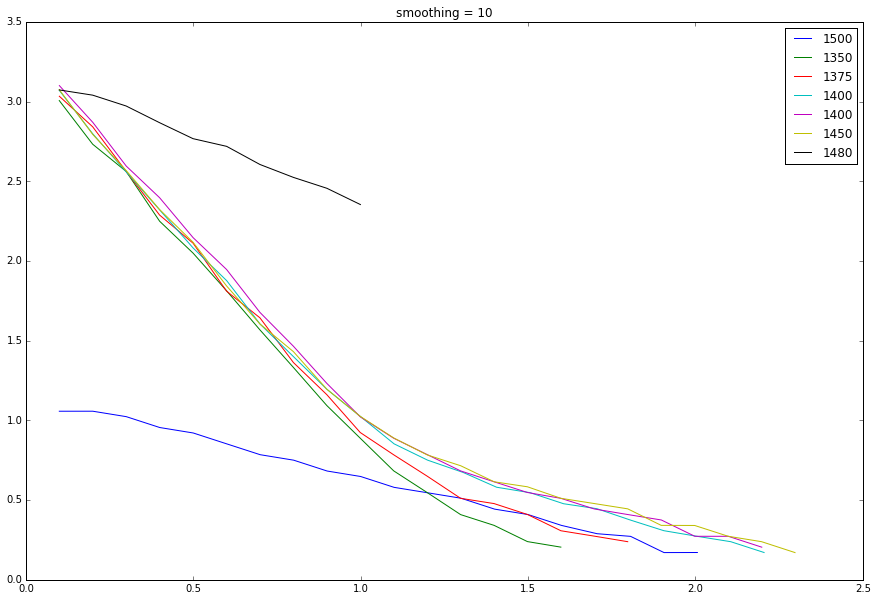

In [231]:
for bin_width in [1,5,10]:
  big_plot()
  for r in results:
    d = r.data
    plt.plot(d.seconds[::bin_width][1:],np.diff(d.meters[::bin_width]) / np.diff(d.seconds[::bin_width]),label=str(d.esc[2]))
  plt.legend()
  plt.title('smoothing = {}'.format(bin_width))
  plt.show()